In [9]:
from src.optimized_code import compute_risk,plurality_outcome_op,for_two_outcome_op, borda_outcome_op,veto_outcome_op, happiness_level, happiness_level_total, compute_risk_combinations, read_voting_
import os,json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
        
voting = read_voting_(path_voting, table_name="four_candidates")[:,:22]
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',5:'F',6:'G'}
voting1 = np.vectorize(mapping.get)(voting)
display(pd.DataFrame(voting1))

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,B,D,C,D,B,B,A,D,C,B,...,A,B,B,B,C,C,B,B,C,B
1,C,A,D,A,C,A,C,B,D,C,...,C,D,A,A,A,A,D,A,A,A
2,A,C,B,C,A,C,B,A,B,A,...,B,A,C,C,D,D,A,D,D,C
3,D,B,A,B,D,D,D,C,A,D,...,D,C,D,D,B,B,C,C,B,D


In [11]:
outcomes_op = [plurality_outcome_op, veto_outcome_op, borda_outcome_op, for_two_outcome_op]
schemes = ["PLURALITY", "VETO", "BORDA", "FOR_TWO"]

for outcome, schema in zip(outcomes_op, schemes):
    print(f"{schema}: {outcome(voting1)}")

PLURALITY: B
VETO: A
BORDA: B
FOR_TWO: A


In [12]:
comb_p = compute_risk_combinations(voting,plurality_outcome_op)[1]
comb_ft = compute_risk_combinations(voting,for_two_outcome_op)[1]
comb_v = compute_risk_combinations(voting,veto_outcome_op)[1]
comb_b = compute_risk_combinations(voting,borda_outcome_op)[1]

rp = compute_risk_combinations(voting,plurality_outcome_op)[0]
rft = compute_risk_combinations(voting,for_two_outcome_op)[0]
rv= compute_risk_combinations(voting,veto_outcome_op)[0]
rb = compute_risk_combinations(voting,borda_outcome_op)[0]


In [13]:
comb_p

,voter,combination,new_result,strategic_happiness,old_happiness,overall_happiness


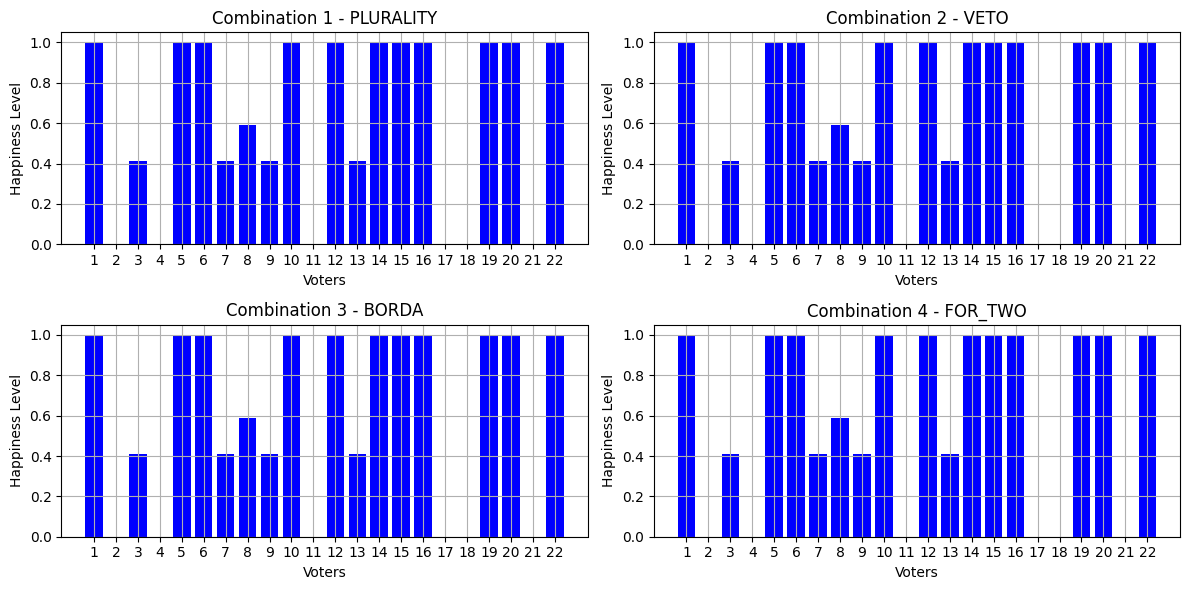

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined schemes, combination, and other necessary variables

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

schemes = ["PLURALITY", "VETO", "BORDA", "FOR_TWO"]

for i, (combination, scheme) in enumerate(zip([comb_p, comb_ft, comb_v, comb_b], schemes)):
    happiness_old = happiness_level_total(voting, plurality_outcome_op(voting))
    
    happiness_new = combination.groupby("voter")["strategic_happiness"].max().values
    
    indices = np.arange(len(happiness_new))  # Generate range of indices
    
    axs[i // 2, i % 2].bar(range(happiness_old.shape[0]), happiness_old, alpha=1, color="blue")
    axs[i // 2, i % 2].bar(indices, happiness_new, color="red", alpha=0.3)  # Use float value for alpha
    axs[i // 2, i % 2].set_xlabel('Voters')
    axs[i // 2, i % 2].set_ylabel('Happiness Level')
    axs[i // 2, i % 2].set_title(f'Combination {i+1} - {scheme}')
    axs[i // 2, i % 2].grid(True)
    # Set integer labels for x-axis
    axs[i // 2, i % 2].set_xticks(np.arange(voting.shape[1]))
    axs[i // 2, i % 2].set_xticklabels(np.arange(1, voting.shape[1] + 1))

plt.tight_layout()
plt.show()



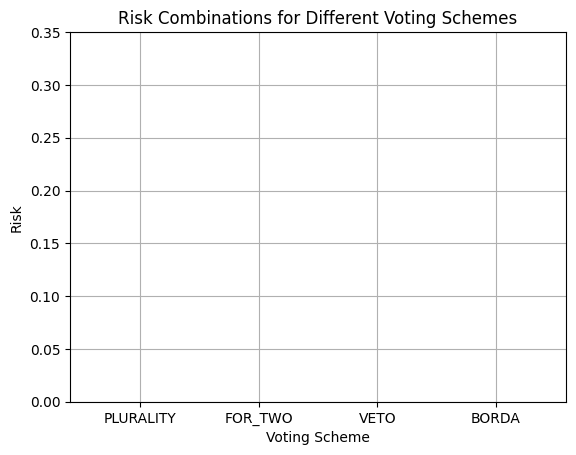

In [15]:
import matplotlib.pyplot as plt

# Data
voting_schemes = ["PLURALITY", "FOR_TWO", "VETO", "BORDA"]
risks = [rp, rft, rv, rb]
colors = ['blue', 'orange', 'green', 'red']  # Define colors for each bar

# Plotting
plt.bar(voting_schemes, risks, color=colors)
plt.xlabel('Voting Scheme')
plt.grid(True)
plt.ylabel('Risk')
plt.ylim(0,0.35)
plt.title('Risk Combinations for Different Voting Schemes')
plt.show()


In [16]:
# Mapping dictionary for numbers to letters
number_to_letter = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G'
}

# Data
data = [
    (0, 3, (1, 4, 2, 5, 0, 6, 3), 1, 0.70389, 0.589513, 8.994586, 9.089513),
    (1, 3, (1, 4, 2, 5, 0, 3, 6), 1, 0.70389, 0.589513, 8.994586, 9.089513),
    (2, 3, (1, 4, 2, 5, 6, 0, 3), 1, 0.70389, 0.589513, 8.994586, 9.089513),
    # Add more data here...
]

# Convert numbers in the third and fourth columns to letters and format numbers to two significant figures
converted_data = []
for row in data:
    converted_row = list(row)
    converted_row[2] = ''.join([number_to_letter[num] for num in row[2]])
    converted_row[3] = number_to_letter[row[3]]
    converted_row[4] = "{:.2g}".format(row[4])
    converted_row[5] = "{:.2g}".format(row[5])
    converted_row[6] = "{:.2g}".format(row[6])
    converted_row[7] = "{:.2g}".format(row[7])
    converted_data.append(converted_row)

# Generate LaTeX table
latex_table = "\\begin{table}[htbp]\n"
latex_table += "    \\centering\n"
latex_table += "    \\begin{tabular}{cccccccc}\n"
latex_table += "        \\toprule\n"
latex_table += "        Voter & Combination & New Result & Strategic Happiness & Old Happiness & Overall Happiness & Initial Overall Happiness \\\\\n"
latex_table += "        \\midrule\n"
for row in converted_data:
    latex_table += f"        {row[0]} & {row[2]} & {row[3]} & {row[4]} & {row[5]} & {row[6]} & {row[7]} \\\\\n"
latex_table += "        \\bottomrule\n"
latex_table += "    \\end{tabular}\n"
latex_table += "    \\caption{Your caption here}\n"
latex_table += "    \\label{tab:my_table}\n"
latex_table += "\\end{table}"

print(latex_table)


\begin{table}[htbp]
    \centering
    \begin{tabular}{cccccccc}
        \toprule
        Voter & Combination & New Result & Strategic Happiness & Old Happiness & Overall Happiness & Initial Overall Happiness \\
        \midrule
        0 & BECFAGD & B & 0.7 & 0.59 & 9 & 9.1 \\
        1 & BECFADG & B & 0.7 & 0.59 & 9 & 9.1 \\
        2 & BECFGAD & B & 0.7 & 0.59 & 9 & 9.1 \\
        \bottomrule
    \end{tabular}
    \caption{Your caption here}
    \label{tab:my_table}
\end{table}
